# Задачи на оценку параметров:

1. Постановка задачи параметрического оценивания
2. Дельта-метод
3. Информация Фишера
4. KL
5. JS
6. Метрика Вассерштайн
7. Оптимальный Транспорт



# 1. Параметрическое оцениваение (на примере MLE)

##### 1. Как оцнивать Probability Density function (PDF) для распределений например 
https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030

2. Задачи
[1], Глава 6
[2], Глава 9


Литература
[1] Machine Learning_ A Probabilistic Perspective [Murphy 2012-08-24]
[2] Лагутин М.Б. Наглядная математическая статистика

# 2. Дельта- метод

##### 1. Источник Casella berger стр 523, пример 10.17 ( заодно там и бутстреп)
https://fsalamri.files.wordpress.com/2015/02/casella_berger_statistical_inference1.pdf

##### 2. Отсюда задача про рыбу  B3
http://www.phidot.org/software/mark/docs/book/pdf/app_2.pdf

##### 3. Просто как работает дельта метод в statsmodels отсюда
https://stats.idre.ucla.edu/r/faq/how-can-i-estimate-the-standard-error-of-transformed-regression-parameters-in-r-using-the-delta-method/3. 

# 3. KL и JL дивергенция

### 1. KL дивергенция:

$KLD(P||Q)=\mathop{\mathbb{E}}x∼P[\log(P(x))Q(x)]=\mathop{\mathbb{E}}x∼P[\log(P(x))−\log(Q(x))]=	\int\limits{x}P(x)(logP(x)−logQ(x))=\sum P(x) \log( \frac{P(x)}{Q(x)}$

### 2. JS дивергенция:

$JSD (P||Q) = \frac{1}{2}KL(P||M) +\frac{1}{2}KL(Q||M) where M= \frac{1}{2}(P+Q)$

##### Пример вот отсюда https://qiita.com/Rowing0914/items/2f3fcb114ae671c7c394

my_KL:  0.00 scipy_KL:  0.00
my_KL:  0.12 scipy_KL:  0.12
my_KL:  0.50 scipy_KL:  0.50
my_KL:  1.12 scipy_KL:  1.12
my_KL:  2.00 scipy_KL:  2.00
my_KL:  3.12 scipy_KL:  3.12
my_KL:  4.50 scipy_KL:  4.50
my_KL:  6.12 scipy_KL:  6.12
my_KL:  8.00 scipy_KL:  8.00


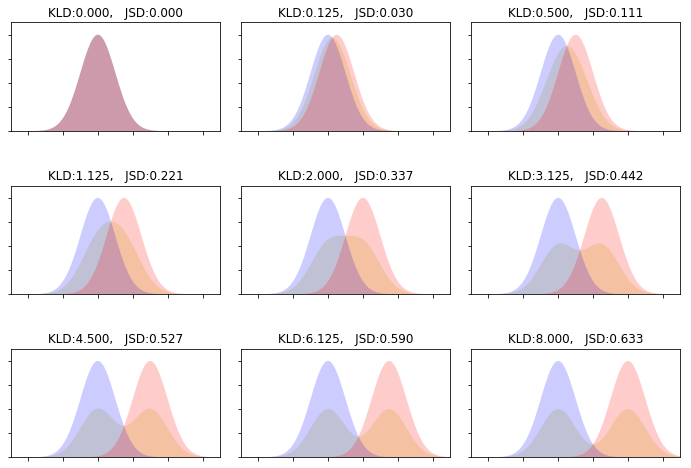

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, entropy

def entropy_multi(p, q):
  return np.sum(p * np.log(p / q), axis=0)

def entropy_single(p):
  return np.sum(p * np.log(p), axis=0)

def KLD(pk, qk):
  # arraynise
  pk = np.asarray(pk)
  # normalise
  pk = 1.0*pk / np.sum(pk, axis=0)
  # check to decide if we apply single or multi entorpy
  if qk is None:
      return np.sum(entropy_single(pk), axis=0)
  else:
      # arraynise
      qk = np.asarray(qk)
      if len(qk) != len(pk):
          raise ValueError("qk and pk must have same length.")
      qk = 1.0*qk / np.sum(qk, axis=0)
      return np.sum(entropy_multi(pk, qk), axis=0)

# data prep
x = np.linspace(-10.0, 10.0, 1000)

# graph setting
plt.figure(figsize=(12,8))

# gradually shift the distribution
for i in np.arange(3):
    for j in np.arange(3):
        # index to shift
        index = i*3 + j
        # probabilistic distribution function
        p = norm.pdf(x, loc=0, scale=1)
        q = norm.pdf(x, loc=index*0.5, scale=1)
        # mean of them
        m = (p+q)/2
        # scipy entropy
        kl = entropy(p, q)
        kl_mine = KLD(p,q)
        # checker
        print("my_KL: ", "{0:.2f}".format(kl_mine), "scipy_KL: ", "{0:.2f}".format(kl))
        # prep for js divergence
        kl_pm = KLD(p, m)
        kl_qm = KLD(q, m)
        js = (kl_pm + kl_qm)/2
        plt.subplot(3,3,i*3+j+1)
        plt.fill_between(x, m, facecolor="y", alpha=0.2)
        plt.fill_between(x, p, facecolor="b", alpha=0.2)
        plt.fill_between(x, q, facecolor="r", alpha=0.2)
        plt.xlim(-5, 7)
        plt.ylim(0,0.45)
        plt.title("KLD:{:>.3f}".format(kl) + ",   JSD:{:>.3f}".format(js))
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

# Информация Фишера

##### 1. Пример вот отсюда http://wittman.physics.ucdavis.edu/Fisher-matrix-guide.pdf

In [37]:
xvals = (-1,1)# the list of x positions at which you will measure 
sigmavals = (0.1,0.1) # the list of uncertainties of those measurements
xvals = (-1,1,1)
sigmavals = (0.1,0.1,0.1)
npar = 2

F = np.zeros([npar,npar])
for x,sigma in zip(xvals,sigmavals):
    for i in range(npar):
        if i==0:
            dfdpi = x
        else:
            dfdpi = 1
        for j in range(npar):
            if j==0:
                dfdpj = x
            else:
                dfdpj = 1
                
            F[i,j] += sigma**-2*dfdpi*dfdpj
        
print (np.mat(F).I) # invert the matrix

[[ 0.00375 -0.00125]
 [-0.00125  0.00375]]


##### Статья по теме https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5180148/

##### 2. Пример вот отсюда - тут какой то реальный кейс и много кода который можно адаптировать по астрологии
http://www.stsci.edu/~dcoe/Fisher/

##### 3. Пример вот отсюда, тут просто посчитать матрицу информации Фишера 
library Cosmic Fisher https://cosmicfish.github.io/documentation/CosmicFishPyLib/example.html#://

# 5. Метрика Вассерштейна

##### 1. Громов-Вассерштейн это тоже самое? Если да, то вот

https://pot.readthedocs.io/en/stable/auto_examples/plot_gromov.html
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html

# 6. Optimal transport

##### 1. Вот в этой библиотечке пройтись по парочке туториалов для 1D и 2D
https://pot.readthedocs.io/en/stable/

# * Параметрическая регрессия  (просто так оставила, вдруг пригодится)
##### Источник: https://pythonhosted.org/PyQt-Fit/Param_tut.html

![Не точно](https://memepedia.ru/wp-content/uploads/2017/08/%D0%BD%D0%BE-%D1%8D%D1%82%D0%BE-%D0%BD%D0%B5-%D1%82%D0%BE%D1%87%D0%BD%D0%BE-%D0%B1%D0%B8%D0%B3-%D1%80%D0%B0%D1%88%D0%BD-%D0%B1%D0%BE%D1%81%D1%81-1.jpg)

Text(0,0.5,'Y')

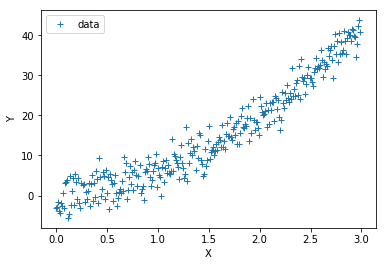

In [3]:
import numpy as np
from matplotlib import pylab as plt
x = np.arange(0,3,0.01)
y = 2*x + 4*x**2 + 3*np.random.randn(*x.shape)
plt.plot(x,y,'+',label='data')
plt.legend(loc=0)
plt.xlabel('X'); plt.ylabel('Y')

# Monte Carlo Estimation
##### Code sourse: http://www-personal.umd.umich.edu/~wiclarks/AstroLab/HOWTOs/NotebookStuff/MonteCarloHOWTO.html